# Machine Learning
In the previous notebook, we performed Exploratory Data Analysis find some patterns in our California Housing dataset. We also performed a linear regression using 1 variable/dimension (or in machine learning, 1 feature).

In this notebook, we will further our investigation using multi-dimensional regression using Scikit Learn (Sklearn). We will also explore another type of regression called Random Forest. 

# 1. Introduction
Import our usual libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(seed=4400)

Import the following from Sklearn.

In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Load our housing data.

In [3]:
housing = pd.read_csv('files/housing.csv')
# use this if you are running from Colab
#housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

type(housing)

pandas.core.frame.DataFrame

Recall that we want to drop the rows with no values.

In [4]:
housing = housing.dropna(axis=0)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

We want to predict the median house values, so we assign it as our ```Y``` variable i.e. our output.

Recall in the previous notebook, we just used median income column as our ```X``` variable (input data for regression). Now we want to use all the columns except for ocean proximity. As the ocean proximity is not of numeric type, additional processing has to be done first before it can be used in machine learning, which we will not be covering in this exercise. 

In [5]:
X = housing.drop(['median_house_value','ocean_proximity'],axis=1)
Y = housing['median_house_value']
print(X.shape,Y.shape)

(20433, 8) (20433,)


Check we that we have the correct data for ```X``` and ```Y```.

In [6]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [7]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## 1.1 Exercise
Use ```train_test_split``` method to divide the data into training and testing data. Use test size of 20%.

In [8]:
# Answer------------------------------------------------------------------
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
# Answer------------------------------------------------------------------

(16346, 8)
(4087, 8)


# 2. Linear regression: 1 dimension vs. 8 dimensions
We should now have our training and testing data. We want to use Sklearn for our regression and we want to consider two cases:
1. Case 1 (1 dimension/feature): median_income
2. Case 2 (8 dimensions/features): median_income, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households 

To avoid confusion, let's rename our data to make them clearer. Also remember that for 1 dimension regression using Sklearn, we also have reshape the data accordingly.

In [9]:
# 1 dimension data. Reshape it first so that Sklearn now we have 1 column to represent 1 feature
X_train_1 = X_train['median_income'].values.reshape(-1,1)
X_test_1 = X_test['median_income'].values.reshape(-1,1)

# 8 dimensions data
X_train_8 = X_train
X_test_8 = X_test

Create separate models using ```linear_model.LinearRegression()```

In [10]:
lin_reg_1 = linear_model.LinearRegression()
lin_reg_8 = linear_model.LinearRegression()

Fit the model to the corresponding training data using ```.fit()```

In [11]:
lin_reg_1.fit(X_train_1,Y_train)
lin_reg_8.fit(X_train_8,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's investigate our models further. We can print out the slope and intercept using ```.coef_``` and ```.intercept_```

In [12]:
print(lin_reg_1.coef_)
print(lin_reg_1.intercept_)

[ 42309.21818466]
43216.63157


## 2.1 Exercise
Print out the slope and intercept for the 8 dimensions model. What can you see?

In [13]:
## Answer-------------------------------
print(lin_reg_8.coef_)
print(lin_reg_8.intercept_)
## Answer-------------------------------

[ -4.23695606e+04  -4.20186771e+04   1.20603374e+03  -8.13238956e+00
   1.19961134e+02  -3.67379541e+01   3.69382834e+01   4.07974625e+04]
-3563521.11041


To compute ```Y``` values the prediction of median house values we use ```.predict``` method and pass in the ```X``` values. 

In [14]:
lin_pred_1 = lin_reg_1.predict(X_test_1)
lin_pred_8 = lin_reg_8.predict(X_test_8)

Below, we have the scatter plots of the median house values. Recall that a perfect prediction will give use the points on the 45 degree line.

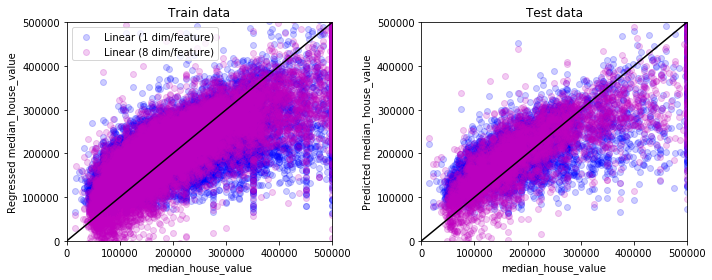

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_train, lin_reg_1.predict(X_train_1), alpha=0.2,c='b', label='Linear (1 dim/feature)')
plt.scatter(Y_train, lin_reg_8.predict(X_train_8), alpha=0.2,c='m', label='Linear (8 dim/feature)')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Train data')
plt.xlabel('median_house_value')
plt.ylabel('Regressed median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Y_test, lin_pred_1, alpha=0.2,c='b')
plt.scatter(Y_test, lin_pred_8, alpha=0.2,c='m')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Test data')
plt.xlabel('median_house_value')
plt.ylabel('Predicted median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()

It seems that having more features increases the accuracy of prediction only slightly. 

Now plot the predictions for the first 50 points in the ```lin_pred_1``` and ```lin_pred_8``` arrays.

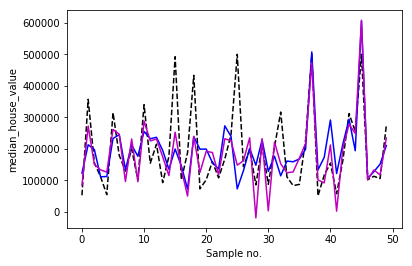

In [16]:
plt.plot(Y_test.values[:50],'--k')
plt.xlabel('Sample no.')
plt.ylabel('median_house_value')
# Answer----------------------------------------------
plt.plot(lin_pred_1[:50],'b')
plt.plot(lin_pred_8[:50],'m')
# Answer----------------------------------------------

# 3. Random Forest
One of the reasons why Sklearn is so easy (but powerful) to use is that the style for setting up the model is very consistent. For example, we have seen before that to regress our data we did the following:
1. Create the model (```lin_reg_8 = linear_model.LinearRegression()```)
2. Fit the model (```lin_reg_8.fit(X_train_8,Y_train)```)
3. Predict the ```Y``` values i.e the output (```lin_pred_8 = lin_reg_8.predict(X_test_8)```)

For other type of regressions, we also need to follow the same workflow. Now let's try another method for regression called Random Forest.

In [17]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)
forest_pred = forest_reg.predict(X_test)

Obviously using Random Forest will no longer give us the slope or intercept. But there are other useful things that we can gain from the model. For example ```.feature_importances_``` will give the relative importance of each column in the training data in influencing the regression.

In [18]:
forest_reg.feature_importances_

array([ 0.15971955,  0.1481843 ,  0.06525059,  0.02486848,  0.0293196 ,
        0.03706759,  0.01957797,  0.51601192])

We can see that the last column of our training data, i.e. median income, is the most important - just like we expected.

Let's plot a bar chart to make it easier to understand the feature importance.

median_income         0.516012
longitude             0.159720
latitude              0.148184
housing_median_age    0.065251
population            0.037068
total_bedrooms        0.029320
total_rooms           0.024868
households            0.019578
dtype: float64


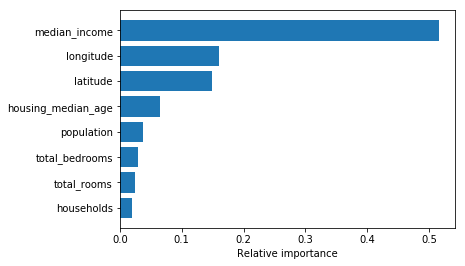

In [19]:
important_features = pd.Series(data=forest_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

pos = np.linspace(7,0, len(important_features))
plt.barh(pos, important_features.values)
plt.yticks(pos, important_features.index)
plt.xlabel('Relative importance');

It looks like the population, total bedrooms, total rooms and households have very little influences on the median house values.

## 3.1 Exercise
Copy the code from Exercise 2.1 and plot the scatter diagrams here. Then add the plots for Random Forest and discuss its performance compared to the linear regression.

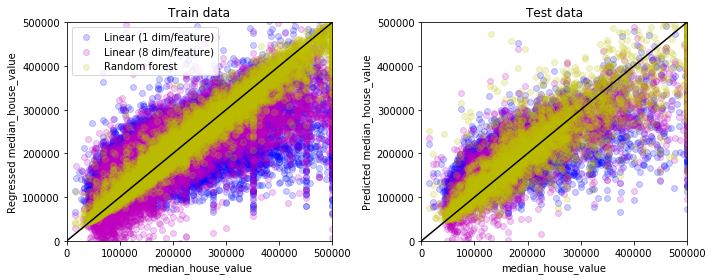

In [20]:
# Answer-----------------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_train, lin_reg_1.predict(X_train_1), alpha=0.2,c='b', label='Linear (1 dim/feature)')
plt.scatter(Y_train, lin_reg_8.predict(X_train_8), alpha=0.2,c='m', label='Linear (8 dim/feature)')
plt.scatter(Y_train, forest_reg.predict(X_train), alpha=0.2,c='y', label='Random forest')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Train data')
plt.xlabel('median_house_value')
plt.ylabel('Regressed median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Y_test, lin_pred_1, alpha=0.2,c='b')
plt.scatter(Y_test, lin_pred_8, alpha=0.2,c='m')
plt.scatter(Y_test, forest_pred, alpha=0.2,c='y')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Test data')
plt.xlabel('median_house_value')
plt.ylabel('Predicted median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()
# Answer-----------------------------------------------------------------------